In [43]:
from scipy.optimize import least_squares
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [55]:

Susceptibles_data_base = [120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 
                             110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 
                             100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90]

TotalDays = [0, 1, 14, 21, 23, 26, 26, 26, 27, 31, 36, 39, 41, 41, 
                      43, 43, 48, 51, 52, 56, 56, 57, 58, 59, 61, 61, 62, 66, 
                      66, 71, 76]

Susceptibles_data = [element/120 for element in Susceptibles_data_base]

Sus_full = []
Total_days_full = np.arange(0, 77)
current = 0
for day in Total_days_full:
    while current < len(TotalDays) and TotalDays[current] == day:
        current += 1
        if current > 0:
        Sus_full.append(Susceptibles_data[current - 1])
    else:
        Sus_full.append(Susceptibles_data[0])
        


Infected_full = [1 - i for i in Sus_full]


S0 = 1  # Initial number of susceptible individuals
I0 = 0.1/120  # Initial number of infected individuals
Y0 = [S0, I0]

t0 = 0
tf = 76
tstep = 0.01
t_span = np.arange(t0, tf, tstep)

In [56]:
print((Sus_full))
print(len(Sus_full))
print(Total_days_full)

[1.0, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.975, 0.975, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9416666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9083333333333333, 0.9083333333333333, 0.8916666666666667, 0.8916666666666667, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8583333333333333, 0.85, 0.85, 0.85, 0.85, 0.8333333333333334, 0.825, 0.8166666666666667, 0.8083333333333333, 0.8083333333333333, 0.7916666666666666,

In [71]:
def smallpox(t, U, beta, nu):
    S, I = U
    dSdt = -beta * S * I
    dIdt = beta * S * I - nu * I
    return [dSdt, dIdt]

initial_guess = [1, 1]


In [72]:
def residue(paras):
    beta, nu = paras
    sol = solve_ivp(
        lambda t, U: smallpox(t, U, beta, nu),
        t_span=(0, Total_days_full[-1] + 1),
        y0=Y0,
        t_eval=Total_days_full,
        vectorized=True,
        dense_output=True
    )
    S_res = Sus_full - sol.y[0]
    I_res = Infected_full - sol.y[1]
    return np.concatenate([S_res, I_res])

    

In [73]:
opt_para = least_squares(residue, initial_guess)

In [74]:
print("beta optimized is: " + str(opt_para.x[0])[0:8])
print("nu optimized is: " + str(opt_para.x[1])[0:8])

beta optimized is: 0.100773
nu optimized is: 0.017033


In [105]:
beta_opt, nu_opt = opt_para.x

t_eval = 200

sol_optimized = solve_ivp(
    lambda t, U: smallpox(t, U, beta_opt, nu_opt),
    t_span=(0, t_eval),
    y0=Y0,
    t_eval=np.arange(0, t_eval, tstep),
    vectorized=True
)

S = sol_optimized.y[0]  # Susceptibles
I = sol_optimized.y[1]  # Infected
T = sol_optimized.t     # Time

In [106]:
R_0 = 1/nu_opt * beta_opt
print("The R_0 value is: " + str(R_0)[0:6])

p = 1 - 1/R_0

print(str(p*100)[0:6] + "%")

minimum_vac = int(np.ceil(120*p))
print("minimum needed to be vaccinated: " + str(minimum_vac) + " individuals")

max_infected = max(I)

print("the maximum number of infected predicted to be alive at the same time was: " + str(max_infected*120))

The R_0 value is: 5.9161
83.097%
minimum needed to be vaccinated: 100 individuals
the maximum number of infected predicted to be alive at the same time was: 63.814436370408984


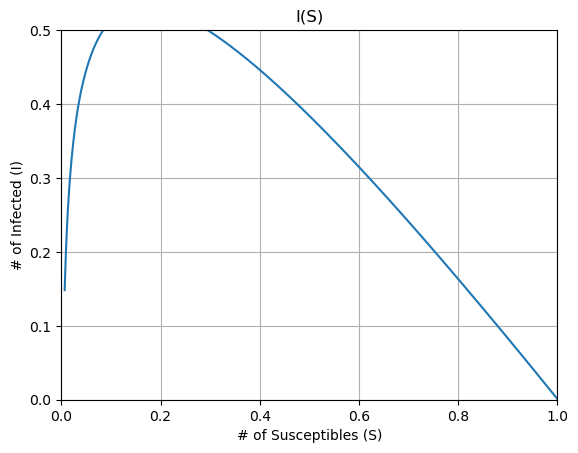

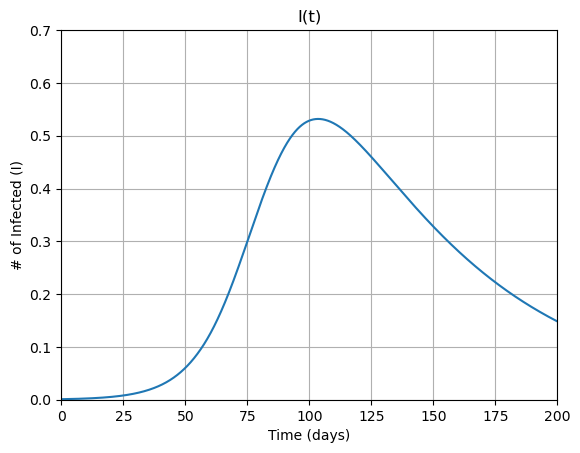

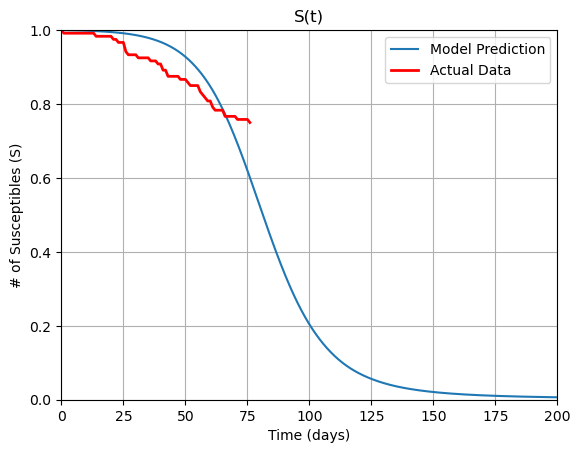

In [107]:
plt.figure()
plt.plot(S, I)
plt.xlabel('# of Susceptibles (S)')
plt.ylabel('# of Infected (I)')
plt.axis([0, 1, 0, 0.5])  
plt.title('I(S)')
plt.grid(True)  

plt.figure()
plt.plot(T, I)  
plt.xlabel('Time (days)')
plt.ylabel('# of Infected (I)')
plt.axis([0, t_eval, 0, 0.7])  
plt.title('I(t)')
plt.grid(True)

plt.figure()
plt.plot(T, S, label="Model Prediction")
plt.plot(Total_days_full, Sus_full, color='red', linestyle='-', label="Actual Data", linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('# of Susceptibles (S)')
plt.axis([0, t_eval, 0, 1])  
plt.title('S(t)')
plt.legend()
plt.grid(True)



plt.show()